In [2]:
import numpy as np
#import pandas as pd

import scipy

import tensorflow as tf
#import sklearn

import matplotlib.pyplot as plt

import pprint

In [3]:
# Other setup
pp = pprint.PrettyPrinter(indent=4)

# Constants
img_dimensions = (400, 400)

(1, 400, 400, 3)


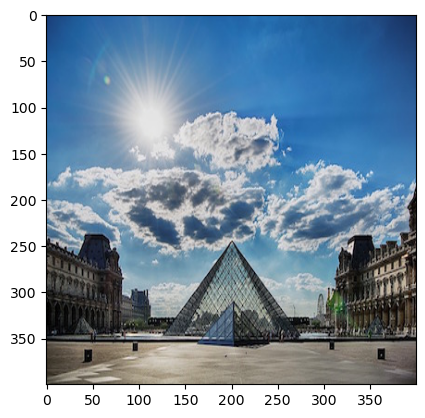

In [4]:
# Load Content Image
from utils import tf_load_img

content_image = tf_load_img("louvre_small.jpg", img_dimensions)

print(content_image.shape)
plt.imshow(content_image[0])
plt.show()

(1, 400, 400, 3)


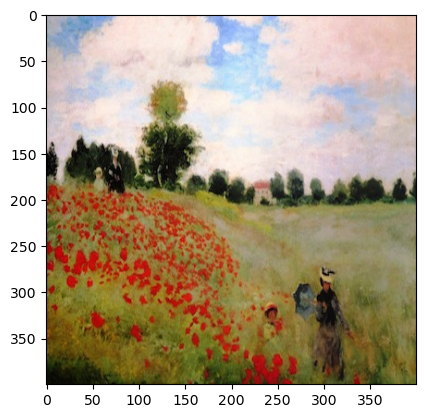

In [5]:
# Load Style Image
style_image = tf_load_img("monet.jpg", img_dimensions)

print(style_image.shape)
plt.imshow(style_image[0])
plt.show()

(1, 400, 400, 3)


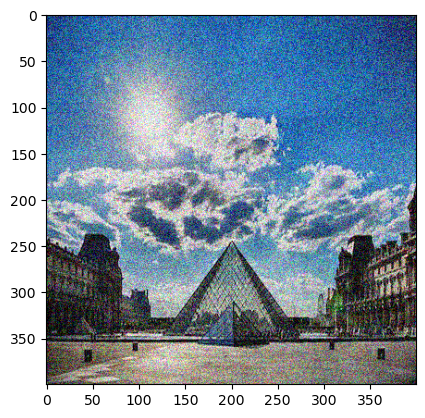

In [6]:
# Randomly initialize image to be generated
from utils import add_uniform_noise

generated_image = add_uniform_noise(content_image, min=-0.25, max=0.25)

print(generated_image.shape)
plt.imshow(generated_image.numpy()[0])
plt.show()

In [7]:
plt.show()
# LOAD PRETRAINED MODEL VGG-19 (Transfer Learning)
# Encoder
vgg = tf.keras.applications.VGG19(include_top=False,
                                  input_shape=(img_dimensions[0], img_dimensions[1], 3),
                                  weights="../pretrained-model/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")
vgg.trainable = False

pp.pprint(vgg)

for layer in vgg.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [9]:
from preprocessing import preprocess

# Layer Constants
# layers go: (<name: str>, <weight: float>)

content_layer = [('block5_conv4', 1.0)]
STYLE_LAYERS = [
    ('block1_conv1', 0.3),
    ('block2_conv1', 0.3),
    ('block3_conv2', 0.2),
    ('block4_conv1', 0.1),
    ('block5_conv1', 0.1)
]


ALL_LAYERS_USED = STYLE_LAYERS + content_layer
ALL_LAYER_NAMES = [layer_delegation[0] for layer_delegation in ALL_LAYERS_USED]

# Initialize Encoder
encoder = tf.keras.Model(inputs=[vgg.input], outputs=[vgg.get_layer(layer_name).output for layer_name in ALL_LAYER_NAMES])

# Initialize targets
content_target = encoder(content_image) # Encoded Content
style_targets = encoder(style_image)    # Encoded Style

# Do the same thing (initialize target encodings), but make them variables rather than constants
preprocessed_content = preprocess(content_image)
preprocessed_style = preprocess(style_image)

In [ ]:
# Neural Style Transfer
from nst.neuralstyletransfer import NeuralStyleTransfer, NstInputs, StyleInputs, NstHyperparameters

nst_inputs = NstInputs(
    content_img=preprocessed_content,
    style=StyleInputs(image=preprocessed_style, layer_delegations=STYLE_LAYERS),
    generated_img=tf.Variable(generated_image))

cost_scalar = 50
_beta_ = 0.65  # 0.575 works well
_alpha_ = 1 - _beta_

nst_hyperparameters = NstHyperparameters(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00125),
    alpha=(_alpha_ * cost_scalar), beta=(_beta_ * cost_scalar))

nst = NeuralStyleTransfer(encode=encoder, nst_inputs=nst_inputs, hyperparameters=nst_hyperparameters)
nst.train(epochs=20_000, epoch_interval=1000)

In [ ]:
len(nst.epoch_outputs)

In [ ]:
nst.epoch_outputs[0]

In [ ]:
nst.epoch_outputs[10]

In [ ]:
nst.epoch_outputs[20]